In [1]:
%matplotlib inline

In [2]:
from js import fetch
import pandas as pd
from datetime import datetime
import random

In [3]:


def str_to_date(str):
    return datetime.strptime(str, '%Y-%m-%d').date()

data = [{'DATE':str_to_date('2020-01-01'), 'TYPE': 'TypeA', 'SALES': 1000},
        {'DATE':str_to_date('2020-01-01'), 'TYPE': 'TypeB', 'SALES': 200},
        {'DATE':str_to_date('2020-01-01'), 'TYPE': 'TypeC', 'SALES': 300},
        {'DATE':str_to_date('2020-02-01'), 'TYPE': 'TypeA', 'SALES': 700},
        {'DATE':str_to_date('2020-02-01'), 'TYPE': 'TypeB', 'SALES': 400},
        {'DATE':str_to_date('2020-02-01'), 'TYPE': 'TypeC', 'SALES': 500},
        {'DATE':str_to_date('2020-03-01'), 'TYPE': 'TypeA', 'SALES': 300},
        {'DATE':str_to_date('2020-03-01'), 'TYPE': 'TypeB', 'SALES': 900},
        {'DATE':str_to_date('2020-03-01'), 'TYPE': 'TypeC', 'SALES': 100}
       ]
df = pd.DataFrame(data)
df

,DATE,TYPE,SALES
0,2020-01-01,TypeA,1000
1,2020-01-01,TypeB,200
2,2020-01-01,TypeC,300
3,2020-02-01,TypeA,700
4,2020-02-01,TypeB,400
5,2020-02-01,TypeC,500
6,2020-03-01,TypeA,300
7,2020-03-01,TypeB,900
8,2020-03-01,TypeC,100


<AxesSubplot:xlabel='DATE'>

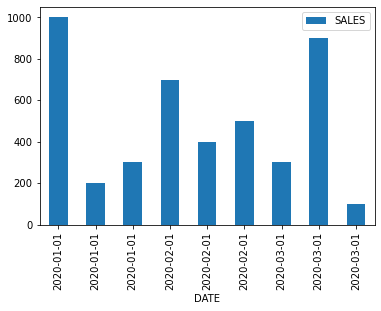

In [4]:
df.plot(kind='bar', x='DATE', y='SALES')

In [5]:
res = await fetch('https://quepid-pr-544.herokuapp.com/api/cases/2293/snapshots/1160.json')
snapshot = await res.json()

In [6]:
queryData = []

for snapshotQuery in snapshot.queries:
    queryData.append({'query':snapshotQuery.query_text, 'score':random.uniform(0, 1)})

In [7]:
df = pd.DataFrame(queryData)
df

,query,score
0,star,0.980639
1,bob,0.480407
2,dude,0.670317


In [8]:
df.groupby(pd.cut(df["score"], 5))

In [9]:
df

,query,score
0,star,0.980639
1,bob,0.480407
2,dude,0.670317


array([[<AxesSubplot:title={'center':'score'}>]], dtype=object)

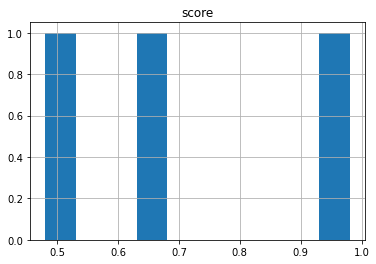

In [10]:
df.hist()

<AxesSubplot:xlabel='score'>

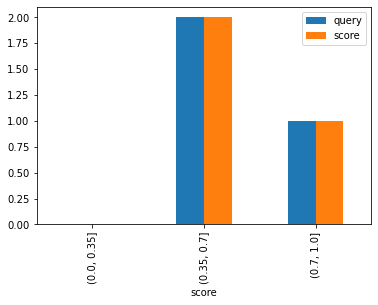

In [12]:
bins = [0,0.35,0.7,1]
df = df.groupby(pd.cut(df['score'], bins=bins)).count()
df.plot(kind='bar')